In [228]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score 

In [229]:
data = pd.read_csv("C:\\Users\\monty\\OneDrive\\Desktop\\intenship\\Titanic-Dataset.csv")


In [230]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [232]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [233]:
#removing cabin unnecessary coloumn 
data= data.drop(columns= 'Cabin',axis=1)

In [234]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

#replacing age(column) null value  with mean of age column


In [235]:
data["Age"].mean()

29.69911764705882

In [236]:
data["Age"].fillna(data['Age'].mean(),inplace=True)

In [237]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Fixing embarked column 


In [239]:
print(data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [240]:
print(data["Embarked"].mode()[0])

S


In [241]:
#replacing the nulll value of Embarked column. with its mode 
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [242]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# analysis the data 

In [243]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [244]:
#how many servived?
#0=non survived  && 1=survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# visuallization 


In [245]:
sns.set()

<Axes: ylabel='count'>

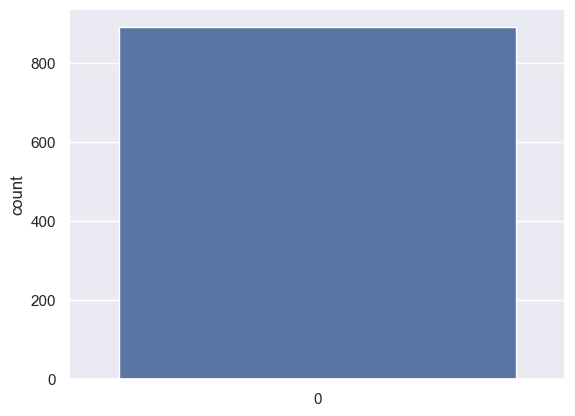

In [246]:
sns.countplot(data['Survived'])

In [247]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

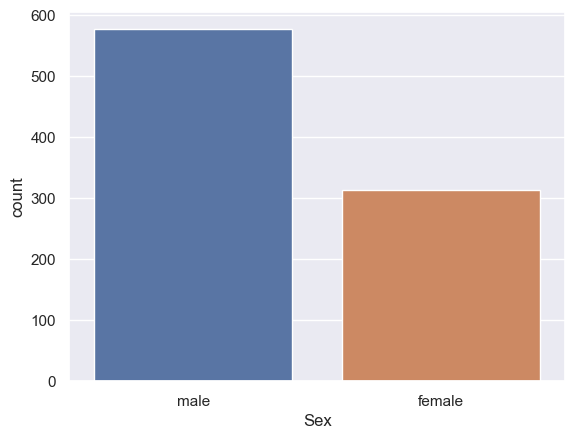

In [248]:
sns.countplot(x='Sex', data=data)

<Axes: xlabel='Sex', ylabel='count'>

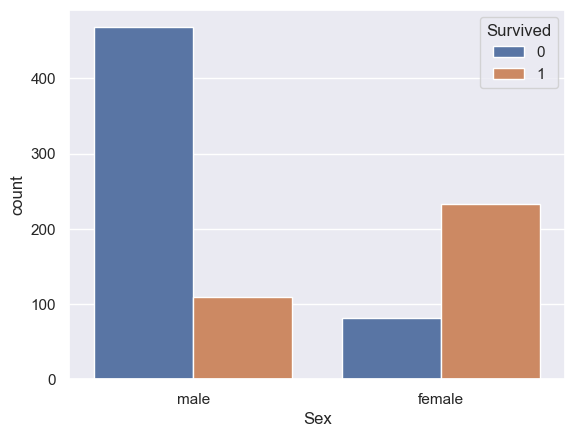

In [249]:
sns.countplot(x='Sex', hue = 'Survived' ,data=data)

<Axes: xlabel='Pclass', ylabel='count'>

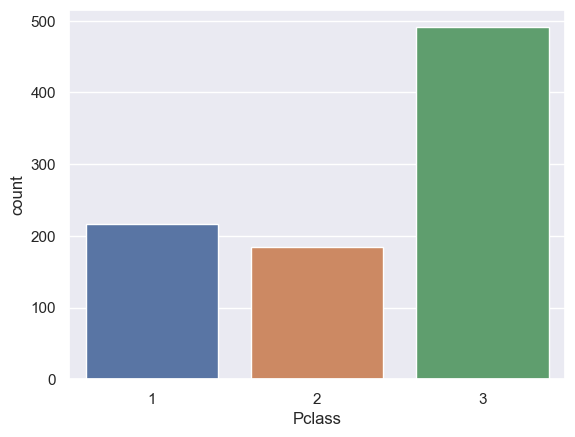

In [250]:
sns.countplot(x='Pclass',data=data)

In [251]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [252]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [253]:
data.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0 ,'C':1, 'Q':2}})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1


In [254]:
X=data.drop(columns= ['PassengerId','Name','Ticket','Survived'], axis=1)
Y=data['Survived']

In [255]:
print(X
     )

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.699118      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[891 rows x 7 columns]


In [256]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#spliting the data into test and train data 


In [257]:
X_train, X_valid, y_train, y_valid = train_test_split(X,Y, test_size=0.2, random_state=7)

In [258]:
print(X.shape, X_train.shape,X_valid.shape)

(891, 7) (712, 7) (179, 7)


# logestical regression and model training

In [259]:
model = LogisticRegression()

In [260]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
dtc=DecisionTreeClassifier()

In [265]:
import pandas as pd


# Read the dataset
data = pd.read_csv("C:\\Users\\monty\\OneDrive\\Desktop\\intenship\\Titanic-Dataset.csv")

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data)

# Split data into features (X) and target variable (y)
X = data_encoded.drop(['Age', 'Survived'], axis=1)
y = data_encoded['Survived']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)



DecisionTreeClassifier()

In [267]:
# Assuming you have already imported LogisticRegression and split your data into X_train, X_test, y_train, and y_test

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Now that the model is trained, you can make predictions
X_train_prediction = model.predict(X_train)


C:\Users\Rishikeshgupta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [268]:
print(X_train_prediction)

[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0
 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 

In [271]:
traning_data_accuracy=accuracy_score(y_train,X_train_prediction)

In [272]:
print('Accuracy score of training data :',traning_data_accuracy)

Accuracy score of training data : 0.8623595505617978


In [ ]:
#check the accuracy of the test data

In [275]:
 X_test_prediction= model.predict (X_test)

In [283]:
print(X_test_prediction)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1]


In [279]:
test_data_accuracy= accuracy_score(y_test,X_test_prediction)

In [280]:
print('Accuracy score of the test data :',test_data_accuracy)

Accuracy score of the test data : 0.7988826815642458


In [ ]:
#DONE